In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [24]:
df = pd.read_csv("Pakistan_COVID19.csv")

def death_to_severity(d):
    if d <= 2:
        return "Low"
    elif d <= 6:
        return "Medium"
    else:
        return "High"

df["Severity"] = df["Deaths"].apply(death_to_severity)
df.head()


,Province,New_Cases,Recoveries,Deaths,Vaccinations,Hospitalized,Tests_Conducted,Severity
0,Punjab,138,104,6,14226,83,7342,Medium
1,Sindh,206,188,2,15104,86,2470,Low
2,KPK,277,234,6,16362,28,26118,Medium
3,Balochistan,371,368,4,19607,60,28117,Medium
4,Islamabad,243,225,6,9466,89,18861,Medium


In [25]:
df_encoded = pd.get_dummies(df, columns=["Province"], drop_first=False)

X = df_encoded.drop(["Deaths", "Severity"], axis=1)
y = df_encoded["Severity"]

print(X.shape, y.shape)


(500, 10) (500,)


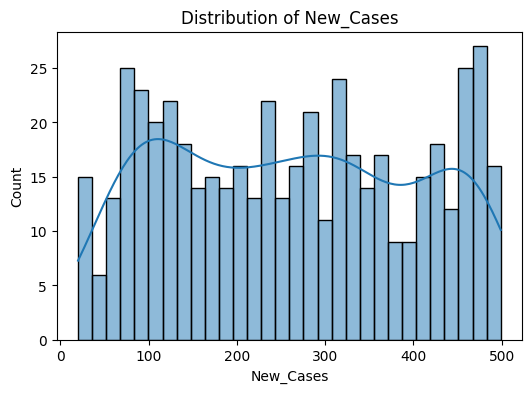

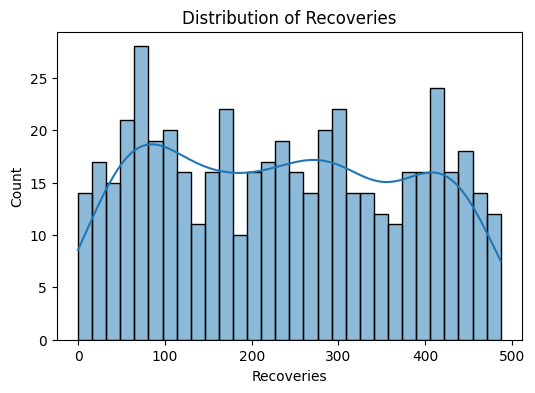

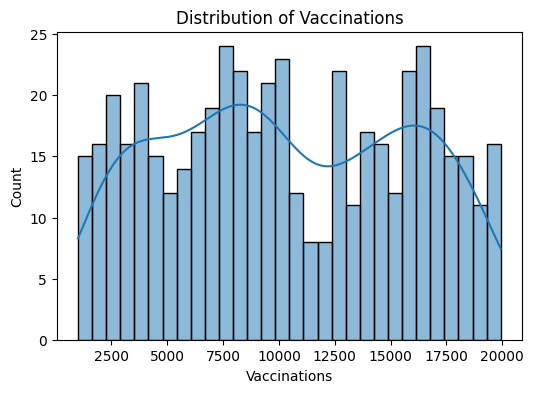

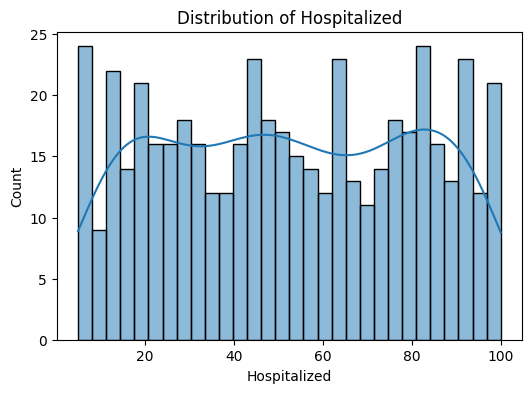

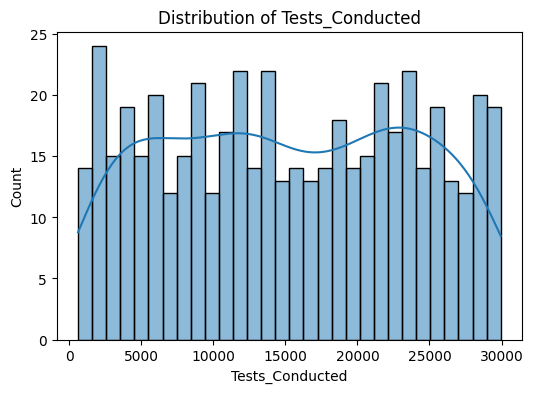

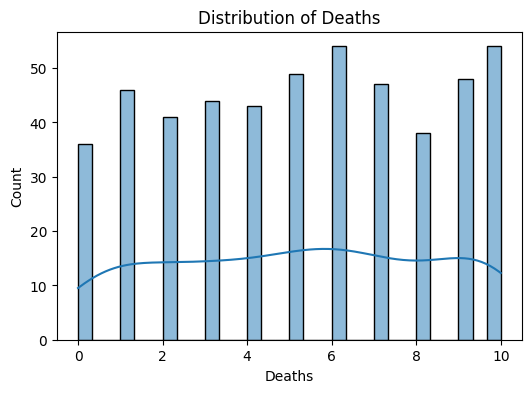

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["New_Cases", "Recoveries", "Vaccinations", 
                "Hospitalized", "Tests_Conducted", "Deaths"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


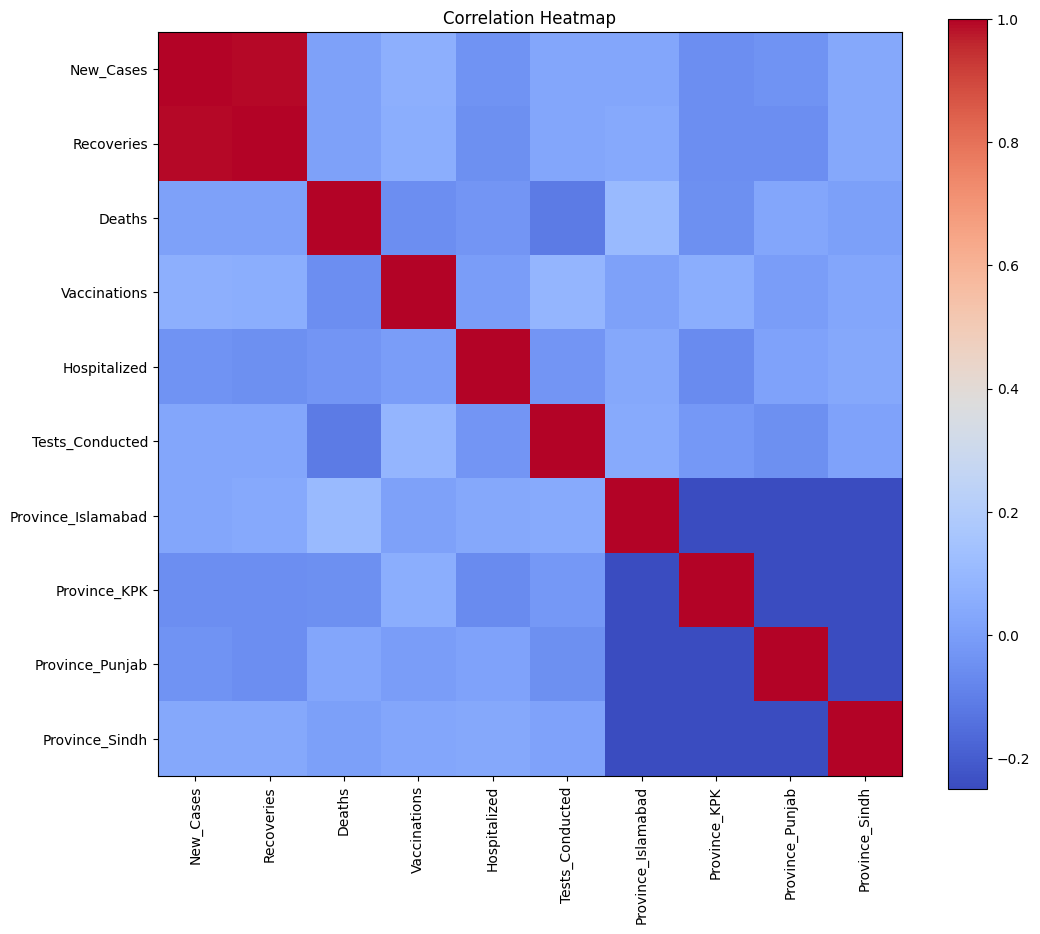

In [12]:
# ---------------------------------------------------
# 6. CORRELATION HEATMAP (MATPLOTLIB ONLY)
# ---------------------------------------------------
corr = df_encoded.corr()

plt.figure(figsize=(12,10))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

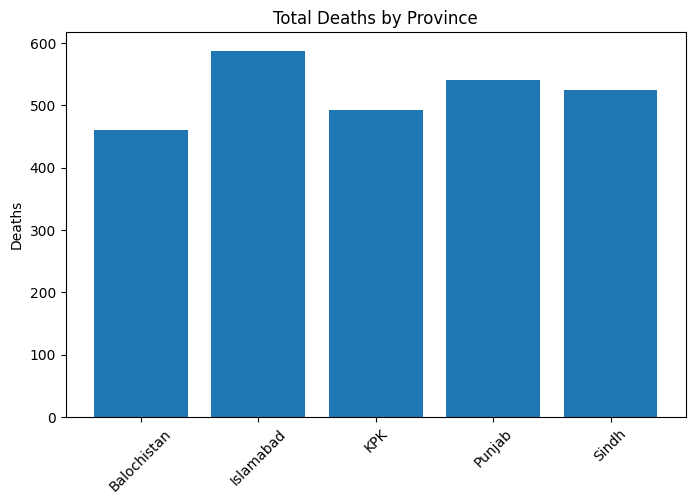

In [16]:
# ---------------------------------------------------
# 7. PROVINCE-LEVEL COMPARISONS
# ---------------------------------------------------
# Re-load original df for clean province names
grouped = df.groupby("Province")

# Total deaths by province
plt.figure(figsize=(8,5))
plt.bar(grouped["Deaths"].sum().index, grouped["Deaths"].sum().values)
plt.title("Total Deaths by Province")
plt.ylabel("Deaths")
plt.xticks(rotation=45)
plt.show()

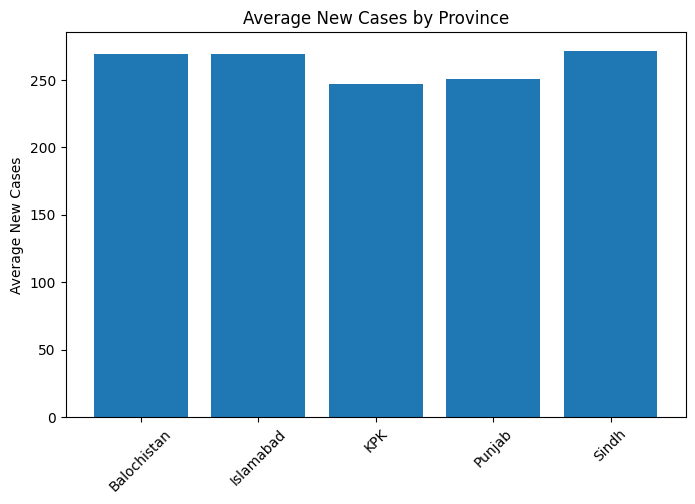

In [17]:
# Average new cases by province
plt.figure(figsize=(8,5))
plt.bar(grouped["New_Cases"].mean().index, grouped["New_Cases"].mean().values)
plt.title("Average New Cases by Province")
plt.ylabel("Average New Cases")
plt.xticks(rotation=45)
plt.show()

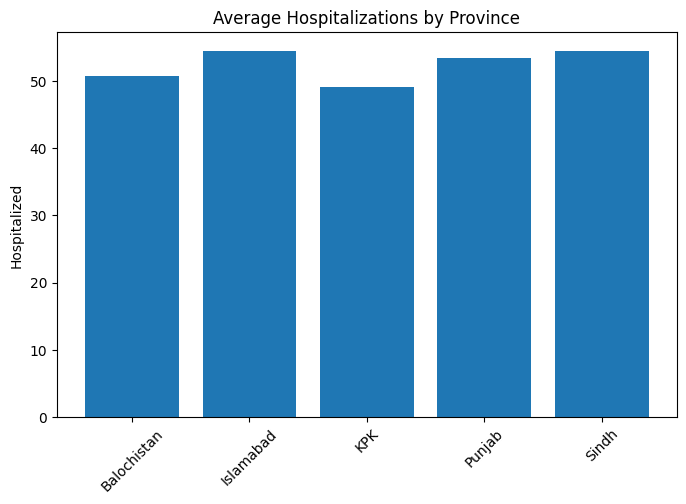

In [18]:
# Average hospitalizations by province
plt.figure(figsize=(8,5))
plt.bar(grouped["Hospitalized"].mean().index, grouped["Hospitalized"].mean().values)
plt.title("Average Hospitalizations by Province")
plt.ylabel("Hospitalized")
plt.xticks(rotation=45)
plt.show()

In [29]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Low/Medium/High → 0/1/2

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [32]:
clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.37

Classification Report:
               precision    recall  f1-score   support

        High       0.37      0.43      0.40        37
         Low       0.25      0.08      0.12        25
      Medium       0.39      0.50      0.44        38

    accuracy                           0.37       100
   macro avg       0.34      0.34      0.32       100
weighted avg       0.35      0.37      0.34       100


Confusion Matrix:
 [[16  2 19]
 [12  2 11]
 [15  4 19]]


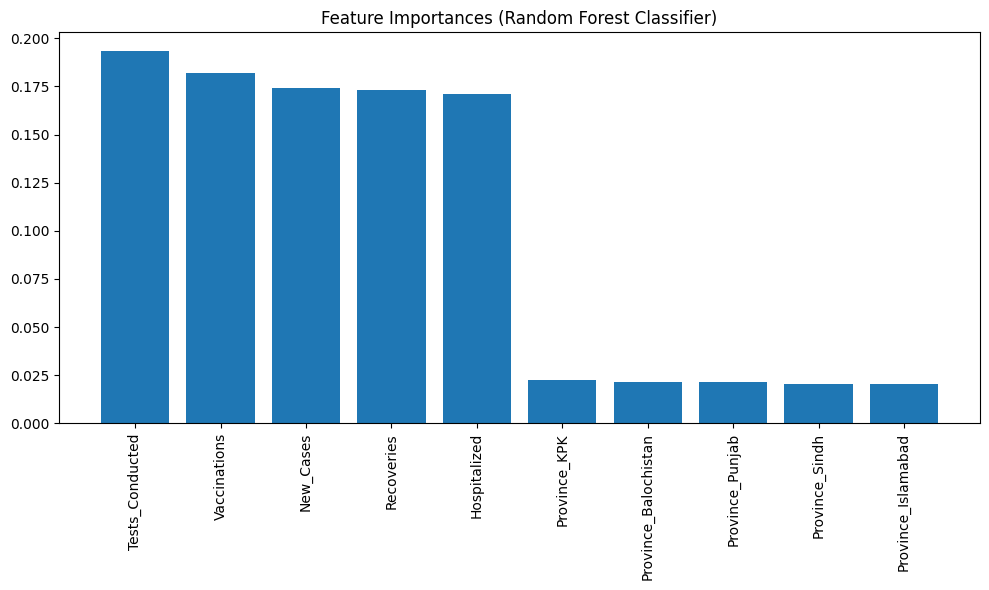

In [34]:
import matplotlib.pyplot as plt
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances (Random Forest Classifier)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
